<a href="https://colab.research.google.com/github/rachioko/Data-Analysis-with-Python/blob/master/2018_LA_Parking_Citation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

sns.set()
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import csv and make time data type string
df  = pd.read_csv("/content/drive/My Drive/Lucky Parking/Data/Parking_Citations_After_July_1_2015.csv", dtype = {'Issue time':str})
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,4361370075,2019/09/17 12:00:00 AM,817,NaN,NaN,LA,NaN,MERC,PA,RD,1324 84TH PL W,00551,55.0,80.69BS,NO PARK/STREET CLEAN,73,6.471017e+06,1.808559e+06
1,4361370064,2019/09/17 12:00:00 AM,811,VM48,NaN,CA,NaN,BUIC,PA,GN,1000 85TH ST W,00551,55.0,88.13B+,METER EXP.,63,6.473192e+06,1.808298e+06
2,4361370053,2019/09/17 12:00:00 AM,809,NaN,NaN,CA,NaN,TOYT,PA,GY,1000 85TH ST W,00551,55.0,80.69BS,NO PARK/STREET CLEAN,73,6.473192e+06,1.808298e+06
3,4361370042,2019/09/17 12:00:00 AM,805,NaN,NaN,CA,NaN,NISS,PA,BK,8021 VERMONT AVE,00551,55.0,80.69BS,NO PARK/STREET CLEAN,73,6.473164e+06,1.810388e+06
4,4361370031,2019/09/17 12:00:00 AM,727,NaN,NaN,CA,NaN,HOND,PA,GY,1473 45TH ST W,00551,55.0,22500E,BLOCKING DRIVEWAY,68,6.469917e+06,1.823537e+06


In [5]:
df= df[df["Issue Date"].str.contains("2018")]
df.shape

(1998852, 18)

In [35]:
#Have a look at the numericals of the data
df.describe()


,Agency,Fine amount,Hour,Year
count,1.998848e+06,1.997178e+06,1.998852e+06,1998852.0
mean,5.184426e+01,7.031647e+01,1.200234e+01,2018.0
std,9.808231e+00,3.164568e+01,4.480701e+00,0.0
min,1.000000e+00,2.500000e+01,0.000000e+00,2018.0
25%,5.300000e+01,6.300000e+01,9.000000e+00,2018.0
50%,5.400000e+01,6.800000e+01,1.100000e+01,2018.0
75%,5.500000e+01,7.300000e+01,1.500000e+01,2018.0
max,9.700000e+01,3.630000e+02,2.300000e+01,2018.0


In [7]:
#check each data type
df.dtypes

Ticket number             object
Issue Date                object
Issue time                object
Meter Id                  object
Marked Time              float64
RP State Plate            object
VIN                      float64
Make                      object
Body Style                object
Color                     object
Location                  object
Route                     object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount               object
Latitude                 float64
Longitude                float64
dtype: object

Feature Engineering

In [0]:
#change the datatypes 
df['Fine amount'] = pd.to_numeric(df['Fine amount'], errors="coerce") #change string to float
df['Issue Date'] = pd.to_datetime(df['Issue Date']) #change string to datetime
df['Time'] = pd.to_datetime(df['Issue time'], format= '%H%M', errors= "coerce").dt.time #change time in new column

In [0]:
#split data into metered and non metered  
temp = {True:'Meter', False : 'No Meter'}
df['Meter']= (df['Meter Id'].notna()).map(temp)
 
#create an hour feature
df['Hour'] = df['Time'].apply(lambda x: x.hour) 

#create day of the week
weekdays=('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
df['Weekday'] = df['Issue Date'].apply(lambda x : weekdays[x.weekday()])

In [0]:
df['Year'] = df['Issue Date'].apply(lambda x : x.year)
months = ('','Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sep', 'Oct', 'Nov', 'Dec')
df['Month'] = df['Issue Date'].apply(lambda x : months[x.month])


In [11]:
#inspect how many null values each column might have
df.apply(lambda x: sum(x.isna()),axis = 0)

Ticket number                  0
Issue Date                     0
Issue time                   534
Meter Id                 1531706
Marked Time              1936247
RP State Plate                 0
VIN                      1998852
Make                        1856
Body Style                  2247
Color                        926
Location                      95
Route                      15422
Agency                         4
Violation code                 0
Violation Description        272
Fine amount                 1674
Latitude                       2
Longitude                      2
Time                        2379
Meter                          0
Hour                        2379
Weekday                        0
Year                           0
Month                          0
dtype: int64

In [12]:
#remove the columns that I don't think are neccessary for this analysis
df= df.drop(["Ticket number","Issue time","VIN","Marked Time","Meter Id",	"Make",	"Body Style",	"Color","Latitude",	"Longitude"], axis = 1)
#Fill Na
df['Hour'].fillna(0,inplace =True)
df.head()

,Issue Date,Location,Route,Agency,Violation code,Violation Description,Fine amount,Time,Meter,Hour,Weekday,Year,Month
1175207,2018-12-31,8862 VAN NUYS BLVD,00335,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,08:32:00,No Meter,8.0,Monday,2018,Dec
1175208,2018-12-31,1032 MAHAR,1L58,3.0,4000A1,NO EVIDENCE OF REG,50.0,13:35:00,No Meter,13.0,Monday,2018,Dec
1175209,2018-12-31,500 WORLD WAY U/L,2C304,2.0,8939,WHITE CURB,58.0,07:00:00,No Meter,7.0,Monday,2018,Dec
1175210,2018-12-31,400 WORLD WAY U/L,1C603,2.0,8939,WHITE CURB,58.0,04:45:00,No Meter,4.0,Monday,2018,Dec
1175211,2018-12-31,600 W/W L/L,2C403,2.0,8936,RED CURB,93.0,11:35:00,No Meter,11.0,Monday,2018,Dec


#Analysis For 2018 Parking Citations

Text(-17.82499999999999, 0.5, 'Citations')

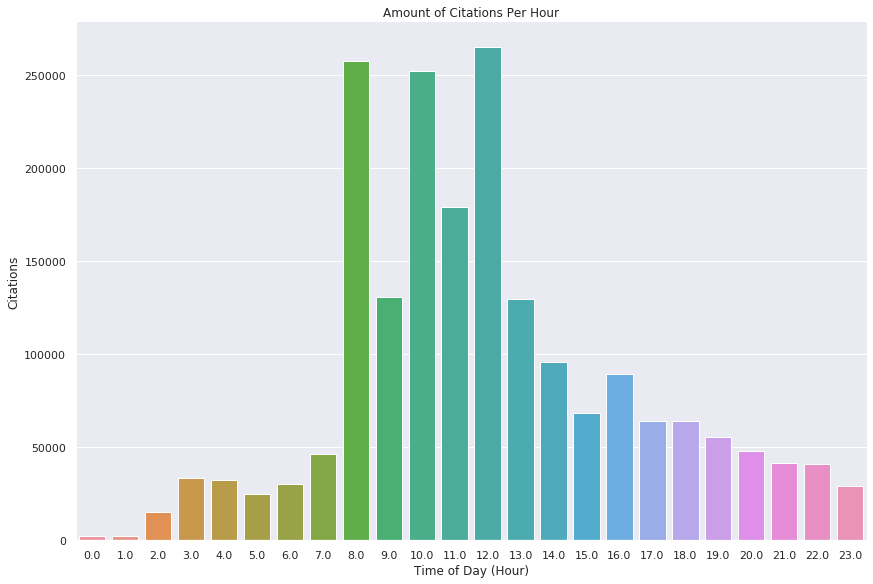

In [13]:
sns.catplot('Hour', data=df, kind = 'count', height=8, aspect=12/8)
plt.title("Amount of Citations Per Hour")
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Citations')

Text(-17.82499999999999, 0.5, 'Citations')

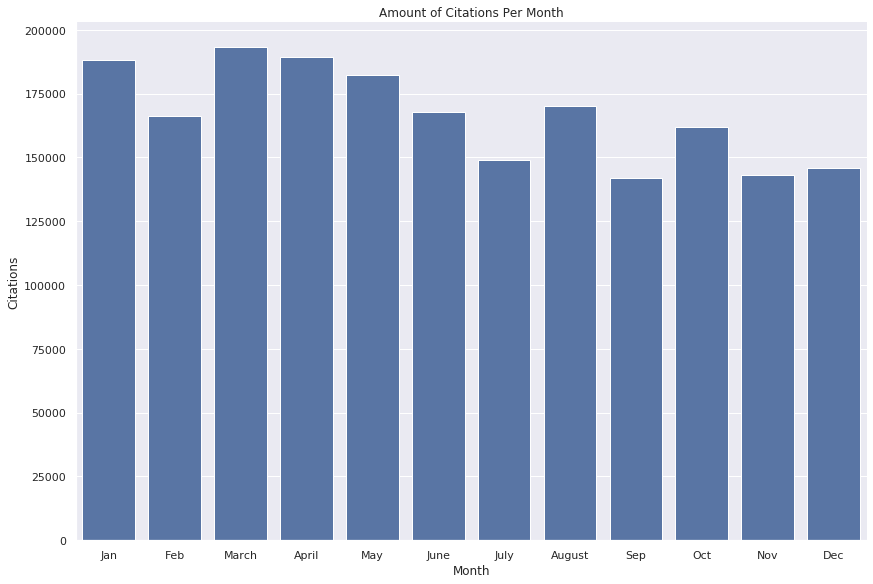

In [16]:
months = ('Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sep', 'Oct', 'Nov', 'Dec')
sns.catplot('Month', data=df, kind = 'count', color = 'b', height=8, aspect=12/8, order= months)
plt.title("Amount of Citations Per Month")
plt.ylabel('Citations')

Text(-17.82499999999999, 0.5, 'Citations')

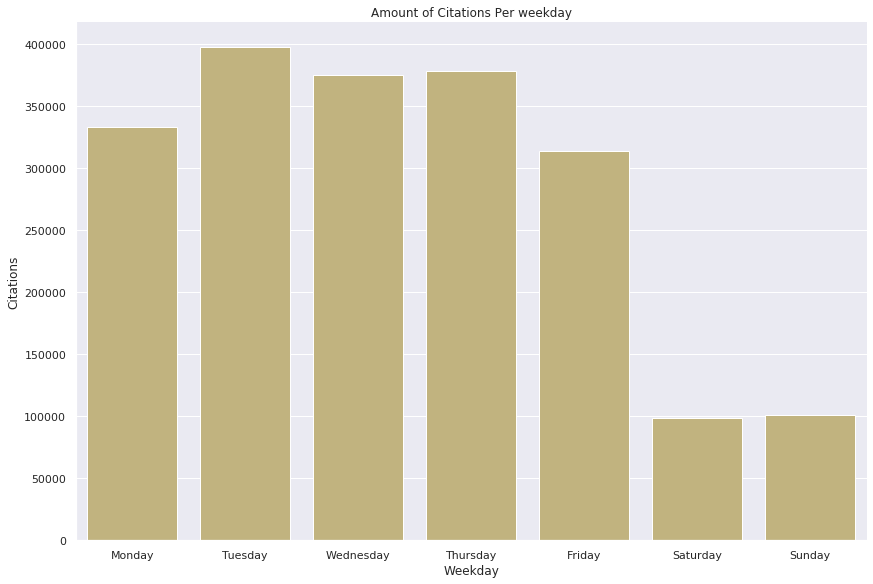

In [18]:
sns.catplot('Weekday', data=df, kind = 'count', color ='y', order = weekdays, height=8, aspect=12/8)
plt.title("Amount of Citations Per weekday")
plt.ylabel('Citations')

In [19]:
df['Violation Description'].describe()

count                  1998580
unique                     432
top       NO PARK/STREET CLEAN
freq                    594548
Name: Violation Description, dtype: object

Text(0.5, 0, 'Citations')

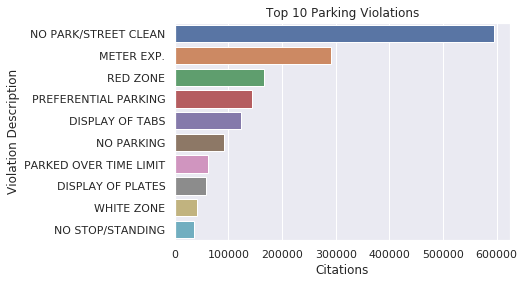

In [20]:
top_violations = df['Violation Description'].value_counts(ascending=False).index[:10]
sns.countplot(y="Violation Description", data=df, order=top_violations)
plt.title("Top 10 Parking Violations")
plt.xlabel('Citations')

Text(0.5, 0, 'Citations')

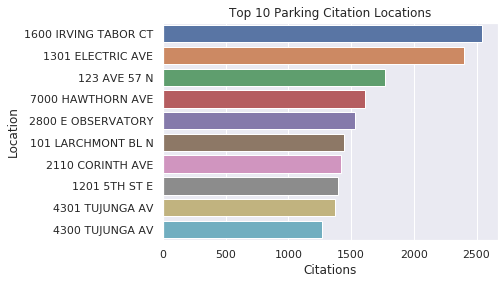

In [21]:
top_locations = df['Location'].value_counts(ascending=False).index[:10]
sns.countplot(y="Location", data=df, order= top_locations)
plt.title("Top 10 Parking Citation Locations")
plt.xlabel('Citations')

In [22]:
#top day and fewest
date_df = df.groupby('Issue Date')['Issue Date'].count().reset_index(name = 'Count')
date_df


,Issue Date,Count
0,2018-01-01,1261
1,2018-01-02,9130
2,2018-01-03,7705
3,2018-01-04,8034
4,2018-01-05,6908
...,...,...
360,2018-12-27,7217
361,2018-12-28,1563
362,2018-12-29,1448
363,2018-12-30,2043


Text(0, 0.5, 'Citations')

<Figure size 1440x720 with 0 Axes>

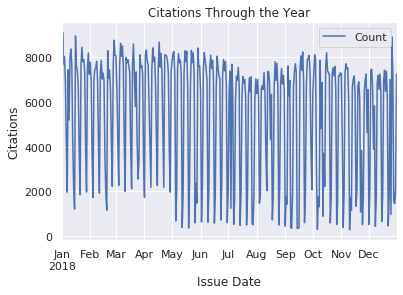

In [23]:
plt.figure(figsize=(20,10))
date_df.plot(x='Issue Date', y = 'Count')
plt.title("Citations Through the Year")
plt.ylabel('Citations')

In [24]:
top_violations_df = df[df['Violation Description'].isin(top_violations)]

top_violations_df.head()

,Issue Date,Location,Route,Agency,Violation code,Violation Description,Fine amount,Time,Meter,Hour,Weekday,Year,Month
1175207,2018-12-31,8862 VAN NUYS BLVD,00335,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,08:32:00,No Meter,8.0,Monday,2018,Dec
1175229,2018-12-31,6201 MULHOLLAND HWY,NaN,4.0,8069B,NO PARKING,73.0,13:30:00,No Meter,13.0,Monday,2018,Dec
1175230,2018-12-31,6201 MULHOLLAND HWY,NaN,4.0,8069B,NO PARKING,73.0,13:28:00,No Meter,13.0,Monday,2018,Dec
1175234,2018-12-31,3200 N CANYON LAKE,NaN,4.0,8056E4,RED ZONE,93.0,13:02:00,No Meter,13.0,Monday,2018,Dec
1175262,2018-12-31,6001 GUTHRIE,00142,51.0,8069BS,NO PARK/STREET CLEAN,73.0,08:43:00,No Meter,8.0,Monday,2018,Dec


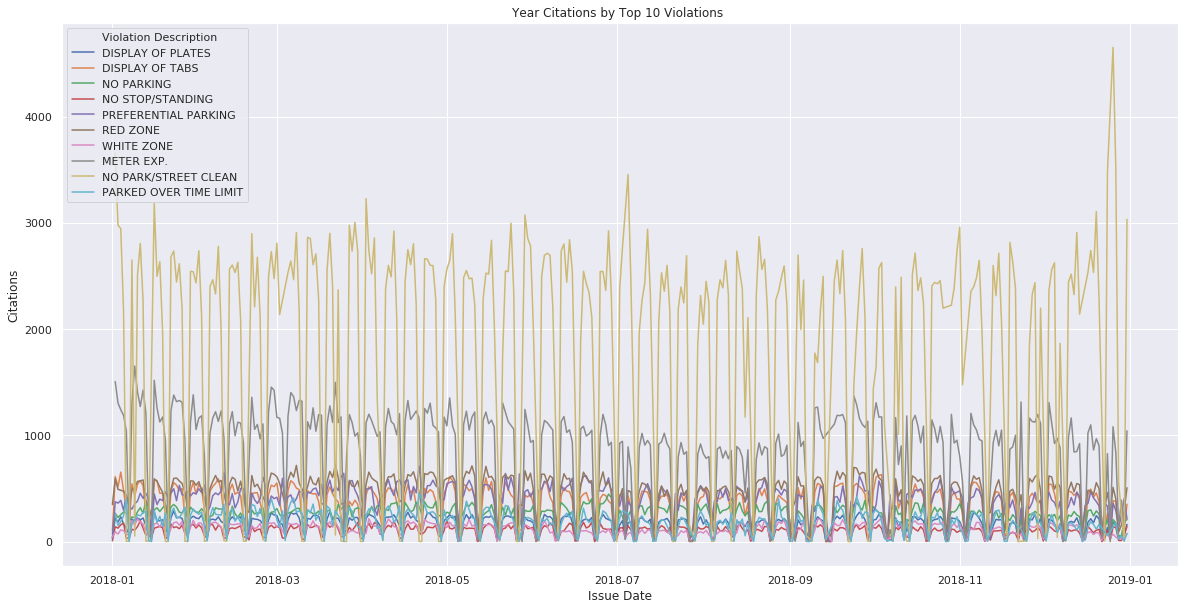

In [29]:
top_10_group = top_violations_df.set_index('Issue Date')
top_10_date = top_violations_df.groupby(['Issue Date', 'Violation Description'])['Issue Date'].count().reset_index(name = 'Count')
top_10_date.head()

plt.figure(figsize=(20,10))
sns.lineplot(x='Issue Date', y= 'Count', hue= 'Violation Description', data=top_10_date)
plt.title("Year Citations by Top 10 Violations ")
plt.ylabel('Citations')
plt.legend(loc = 'upper left')


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


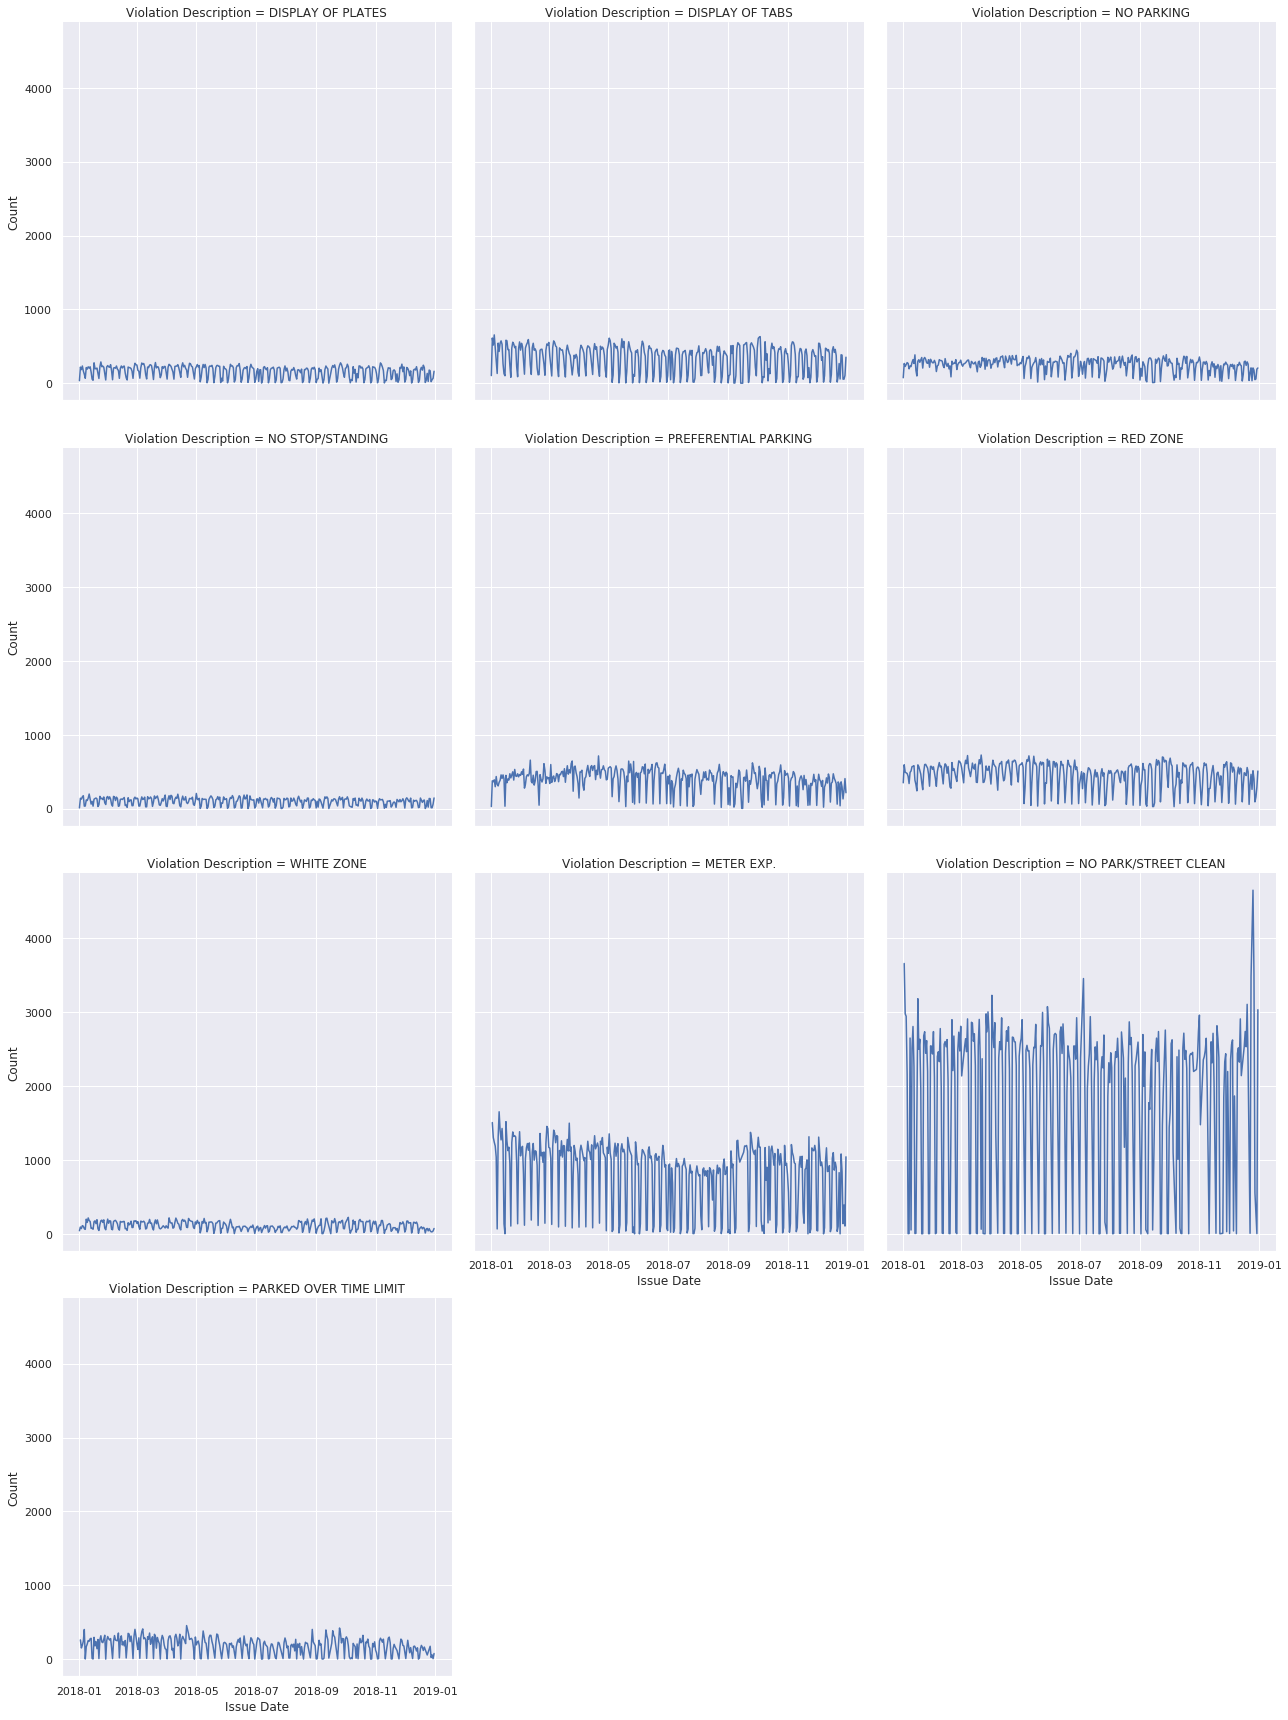

In [30]:
grid = sns.FacetGrid(data= top_10_date, col= 'Violation Description', col_wrap= 3, size=6)
grid.map(sns.lineplot, "Issue Date", "Count")

Text(0.5, 0, 'Time of Day (Hour)')

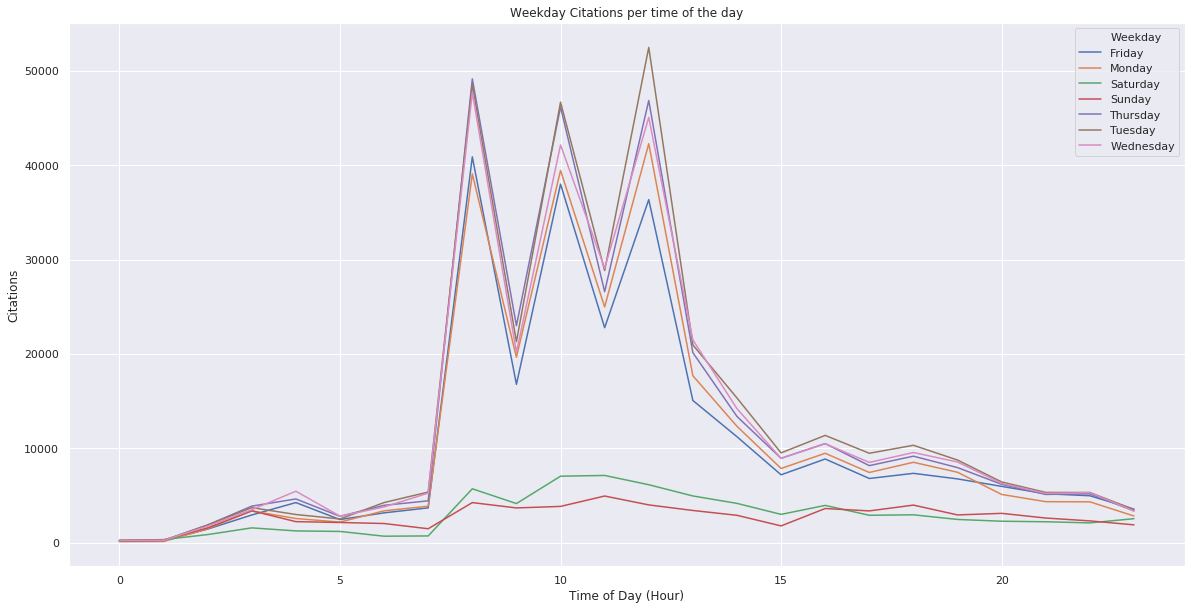

In [31]:
top_10_hour = top_violations_df.groupby(['Hour', 'Weekday'])['Hour'].count().reset_index(name = 'Count')
top_10_hour.head()
plt.figure(figsize=(20,10))
sns.lineplot(x='Hour', y= 'Count', hue= 'Weekday', data=top_10_hour)
plt.title("Weekday Citations per time of the day")
plt.ylabel('Citations')
plt.xlabel('Time of Day (Hour)')

In [32]:
grid_df = top_violations_df.groupby(['Hour', 'Weekday','Violation Description'])['Hour'].count().reset_index(name = 'Count')
grid_df.head()

,Hour,Weekday,Violation Description,Count
0,0.0,Friday,DISPLAY OF PLATES,15
1,0.0,Friday,DISPLAY OF TABS,13
2,0.0,Friday,NO PARK/STREET CLEAN,5
3,0.0,Friday,NO PARKING,39
4,0.0,Friday,NO STOP/STANDING,1


Text(0.5, 0, 'Time of Day (Hour)')

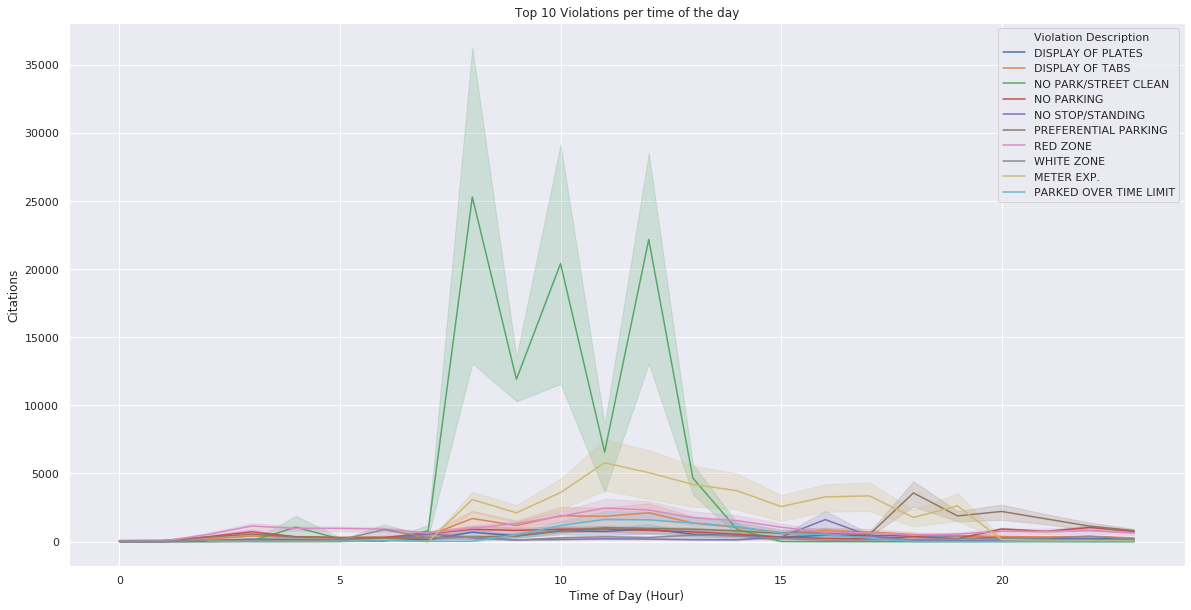

In [33]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Hour', y= 'Count', hue= 'Violation Description', data=grid_df)
plt.title("Top 10 Violations per time of the day")
plt.ylabel('Citations')
plt.xlabel('Time of Day (Hour)')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


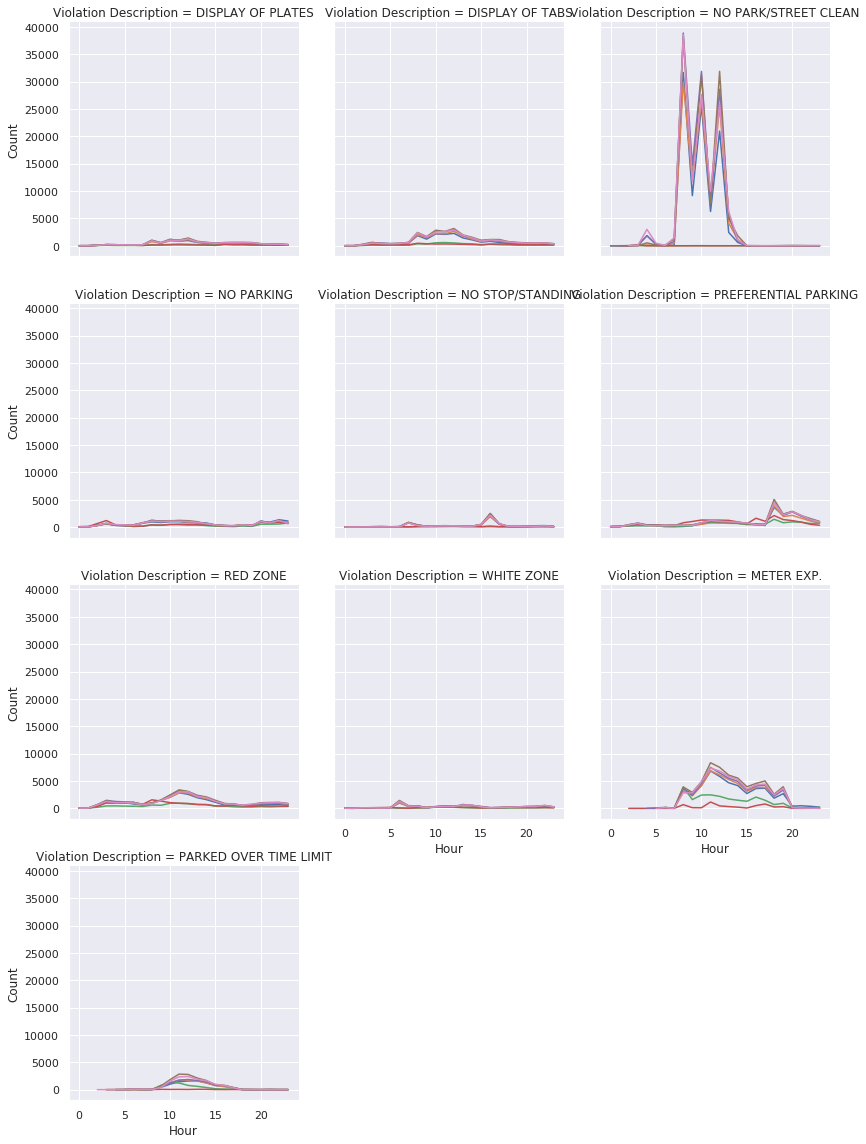

In [34]:
grid = sns.FacetGrid(data= grid_df, hue='Weekday', col= 'Violation Description', col_wrap= 3, size=4)
grid.map(sns.lineplot, "Hour", "Count")